# Figure 2

In [1]:
import os, glob
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## a) The principal axis

In [2]:
fused = matrices.MicrostructuralCovarianceMatrix('thickness-density', laminar_density=True)
fusedg = surfaces.MicrostructuralCovarianceGradients(fused, n_components_report = 1)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/fused/parc-schaefer1000_curv-smooth-10_laminar_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/fused/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/fused/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


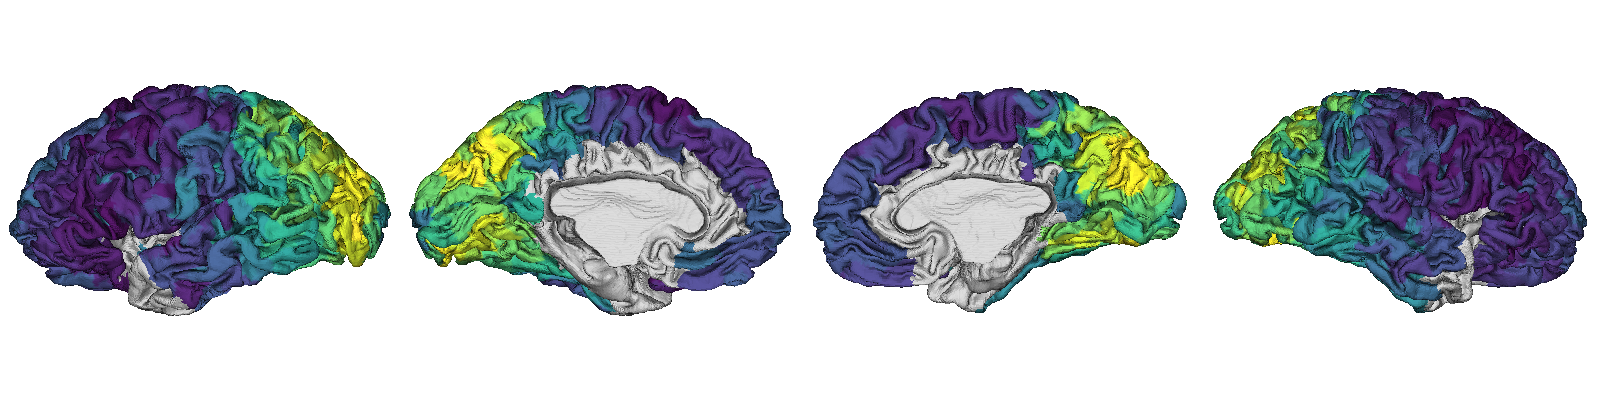

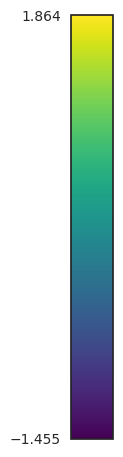

In [3]:
helpers.plot_surface(helpers.deparcellate(fusedg.parcellated_data.iloc[:, 0], fusedg.parcellation_name), cmap='viridis', inflate=False, plot_downsampled=False, cbar=True, layout_style='row')

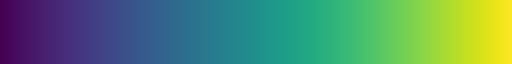

In [4]:
sns.color_palette('viridis', as_cmap=True)

## b) Reorder matrices

Note: The laminar density covariance matrix is later recolored manually

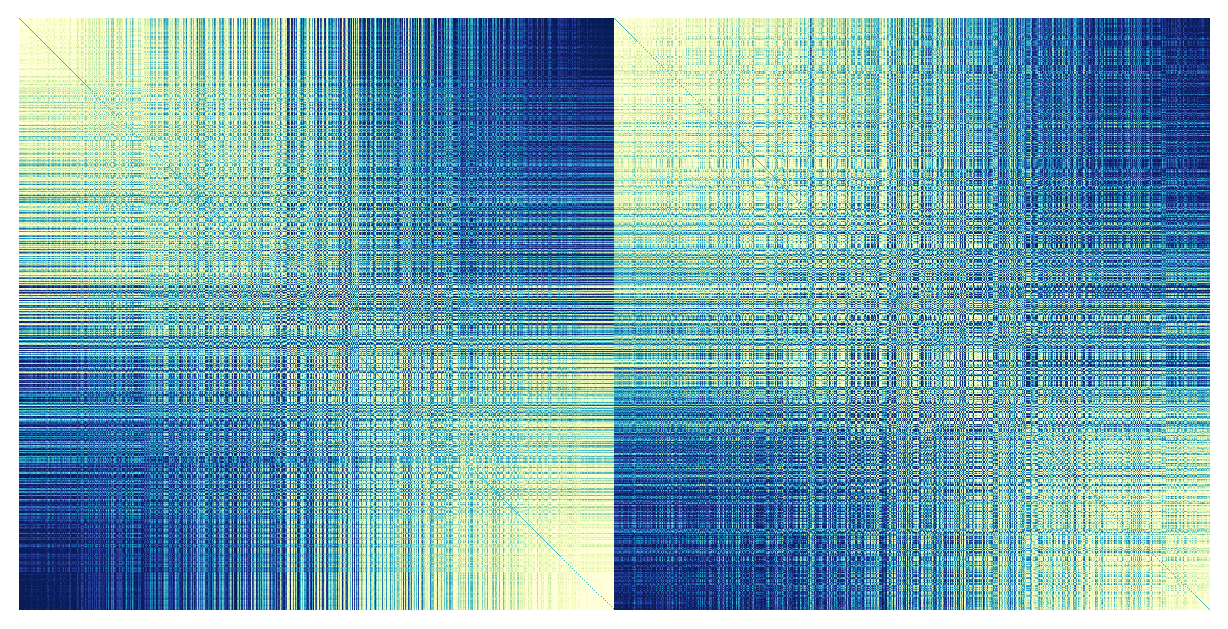

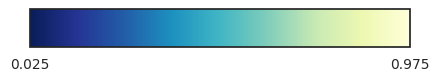

In [5]:
fusedg.plot_reordered_matrix()

## d) Correlation of combined principal axis with the principal axis of thickness covariation

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-889.npz and have the same parcels


(            LTC G1
 Fused G1  0.840988,
           LTC G1
 Fused G1     0.0)

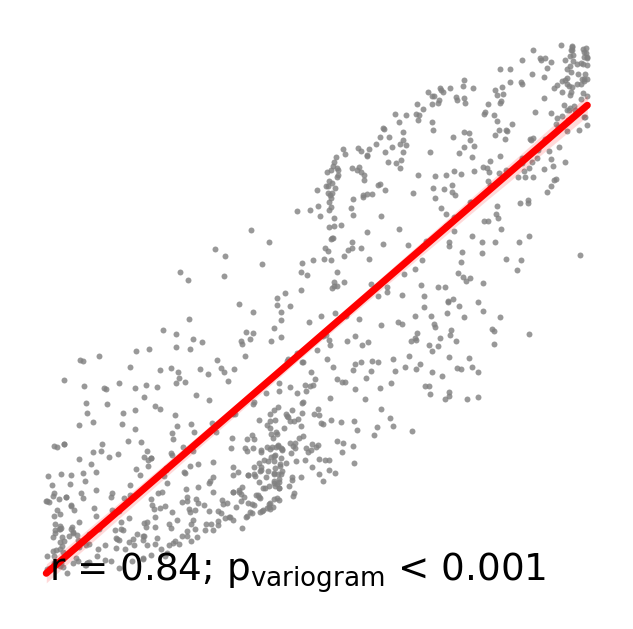

In [6]:
ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness'))
ltcg.correlate(fusedg, x_columns=['LTC G1'], y_columns=['Fused G1'], axis_off=True)

## c) Laminar thickness and density variation across their combined principal axis

Creating microstructural covariance matrix
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/mpc/parc-schaefer1000_laminar_exc-adysgranular_metric-parcor/matrix.npz
Creating microstructural covariance matrix
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/mpc/parc-schaefer1000_laminar_exc-adysgranular_metric-parcor/matrix.npz


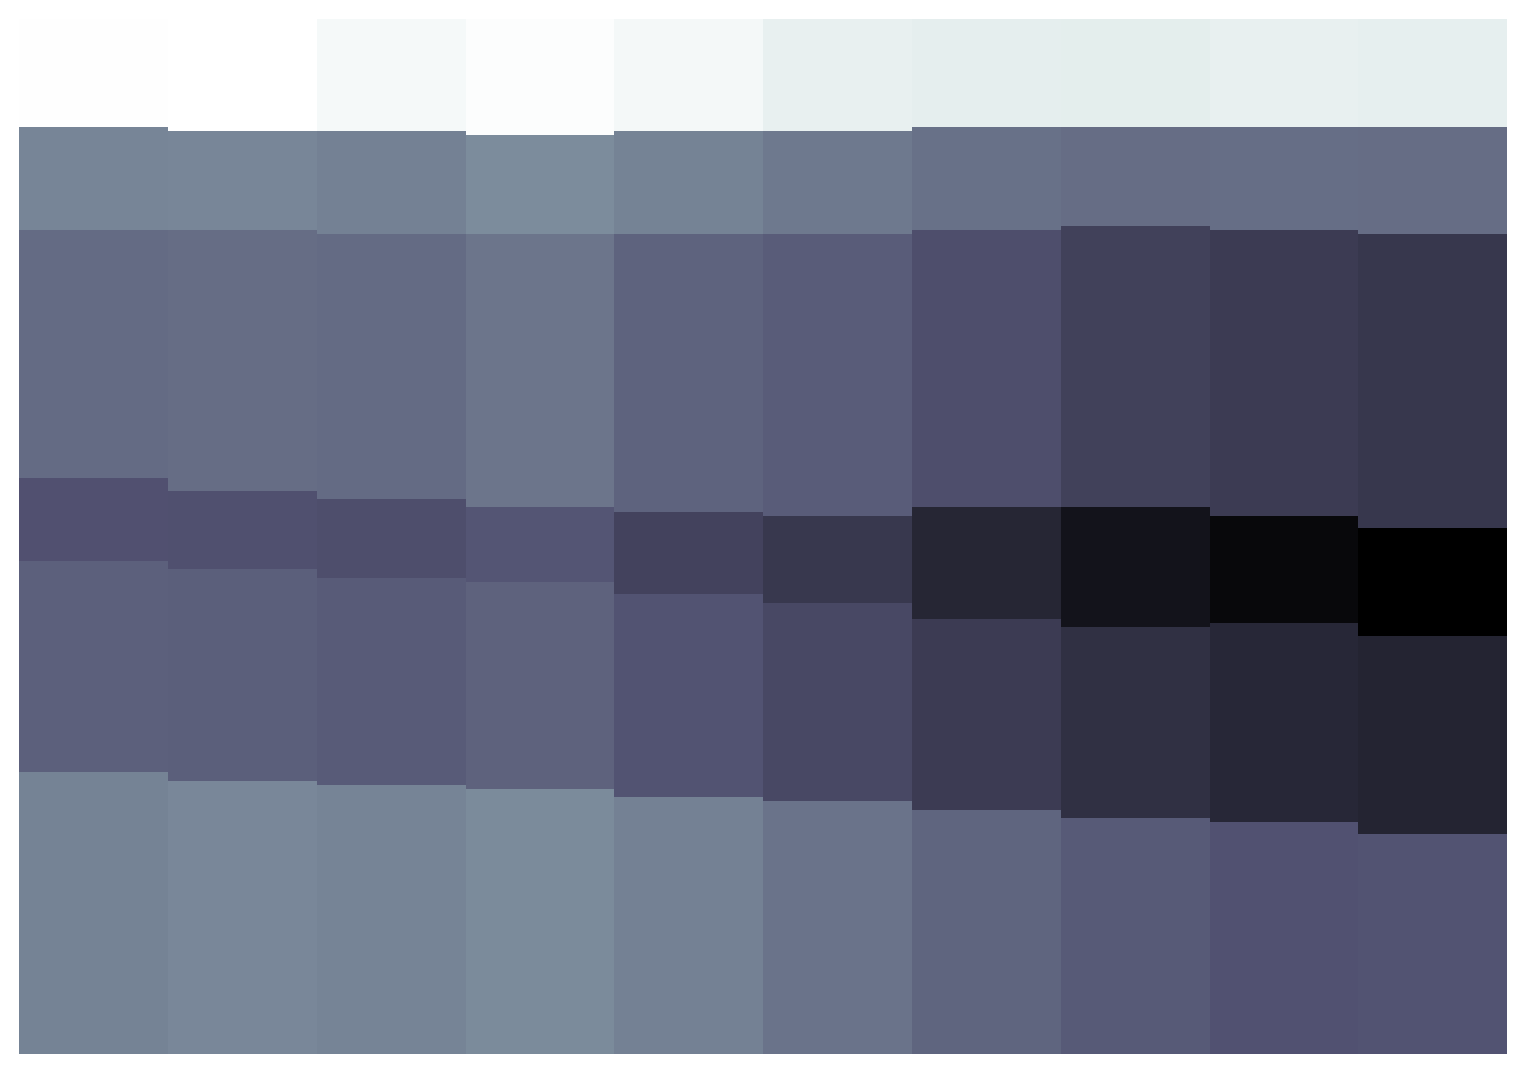

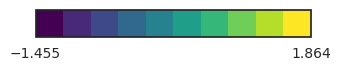

In [7]:
fusedg.plot_binned_profile()

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/fused/parc-schaefer1000_curv-smooth-10_laminar_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09fair_n-10/variogram_surrogates_Fused G1_nperm-1000_nparcels-889.npz and have the same parcels

Correlation coefficients


,Fused G1
Layer 1,-0.200261
Layer 2,0.266920
Layer 3,0.476559
Layer 4,0.397549
Layer 5,-0.334370
Layer 6,-0.810409



p-values


,Fused G1
Layer 1,0.0
Layer 2,0.0
Layer 3,0.0
Layer 4,0.0
Layer 5,0.0
Layer 6,0.0


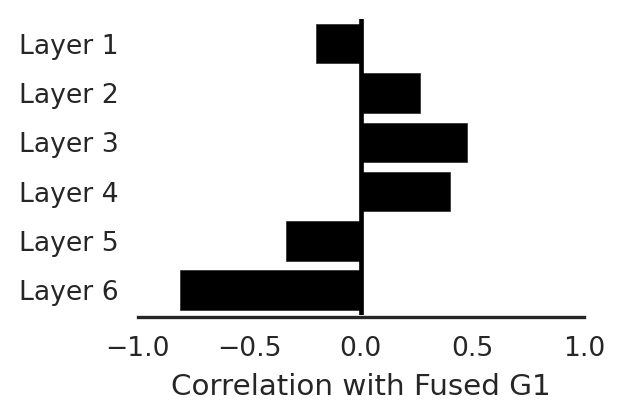

In [8]:
laminar_features = surfaces.LaminarFeatures(parcellation_name='schaefer1000')
laminar_features.columns = np.array([p.replace(' relative thickness', '') for p in laminar_features.columns])
laminar_features.parcellated_data.columns = laminar_features.columns
r, p = fusedg.correlate(
    laminar_features, 
    x_columns=['Fused G1'], 
    y_columns=[f'Layer {n}' for n in range(1, 7)],
    regplot=False
)
print("\nCorrelation coefficients")
display(r)
print("\np-values")
display(p)

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/fused/parc-schaefer1000_curv-smooth-10_laminar_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09fair_n-10/variogram_surrogates_Fused G1_nperm-1000_nparcels-889.npz and have the same parcels

Correlation coefficients


,Fused G1
Layer 1,0.408249
Layer 2,0.380452
Layer 3,0.609501
Layer 4,0.747534
Layer 5,0.696829
Layer 6,0.578441



p-values


,Fused G1
Layer 1,0.0
Layer 2,0.0
Layer 3,0.0
Layer 4,0.0
Layer 5,0.0
Layer 6,0.0


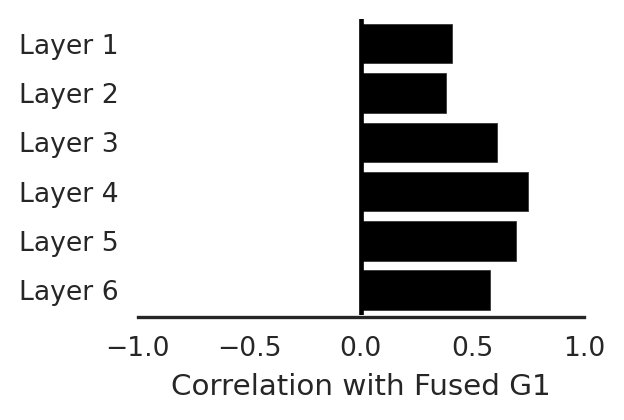

In [9]:
laminar_features = surfaces.LaminarFeatures(parcellation_name='schaefer1000')
laminar_features.columns = np.array([p.replace(' density', '') for p in laminar_features.columns])
laminar_features.parcellated_data.columns = laminar_features.columns
r, p = fusedg.correlate(
    laminar_features, 
    x_columns=['Fused G1'], 
    y_columns=[f'Layer {n}' for n in range(1, 7)],
    regplot=False
)
print("\nCorrelation coefficients")
display(r)
print("\np-values")
display(p)


 Cellular Density


/tmp/ipykernel_592415/1486418026.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr = pd.Series(index=laminar_feature.columns)
/tmp/ipykernel_592415/1486418026.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=laminar_feature.columns)


1    0.033275
2    0.086164
3    0.341374
4    0.568363
5    0.219755
6    0.286046
dtype: float64

1    7.695119e-01
2    4.472767e-01
3    1.942064e-03
4    3.812217e-08
5    5.015659e-02
6    1.010566e-02
dtype: float64


 Cellular Size


1   -0.191827
2   -0.196892
3   -0.350109
4   -0.621828
5   -0.475762
6   -0.355878
dtype: float64

1    8.826586e-02
2    8.002920e-02
3    1.454601e-03
4    7.458984e-10
5    8.192548e-06
6    1.196421e-03
dtype: float64

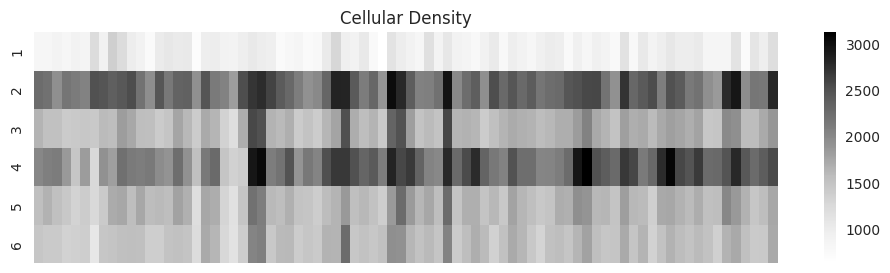

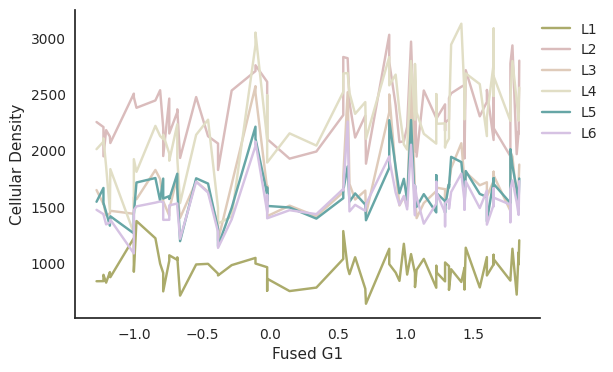

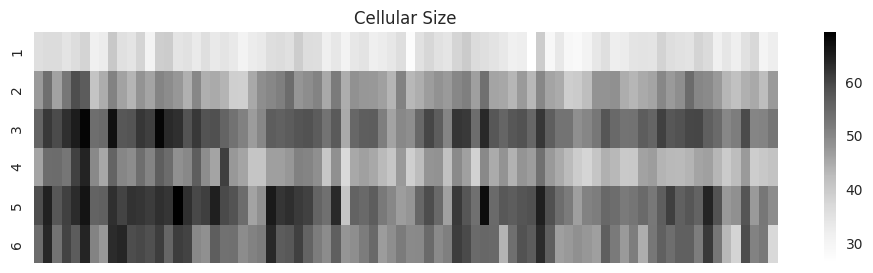

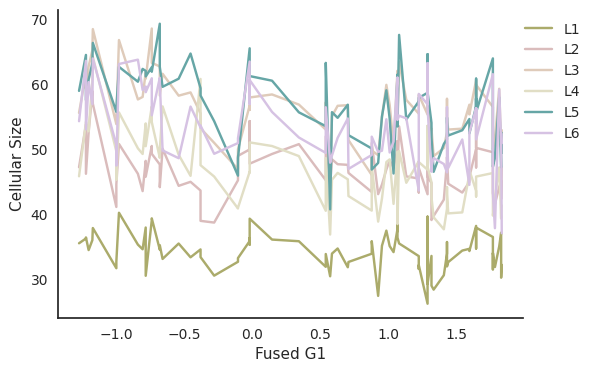

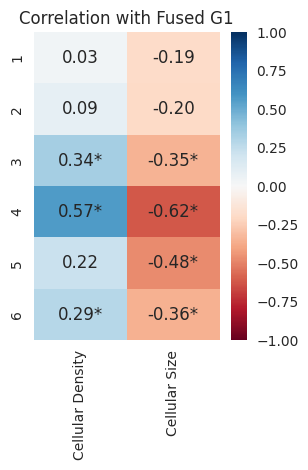

In [10]:
samples, laminar_density, laminar_size, laminar_count = datasets.fetch_laminar_cellular_features()
samples.loc[:, 'FusedG1'] = fusedg.surf_data[samples.index, 0]

laminar_features = {'cellular density':laminar_density, 'cellular size':laminar_size}
corrs = {}
pvals = {}
for name, laminar_feature in laminar_features.items():
    reordered_laminar_feature = laminar_feature.loc[samples.sort_values('FusedG1').index].reset_index(drop=True)
    fig, ax = plt.subplots(1, figsize=(12, 3))
    sns.heatmap(reordered_laminar_feature.T, cmap="Greys", ax=ax)
    ax.set_title(name.title())
    ax.set_xticks([])
    fig, ax = plt.subplots(1, figsize=(6,4))
    for layer in range(1, 7):
        ax.plot(
            samples['FusedG1'].sort_values().values, 
            reordered_laminar_feature.loc[:, str(layer)], 
            color=datasets.LAYERS_COLORS['bigbrain'][layer-1],
        )
    ax.legend([f'L{i}' for i in range(1,7)], bbox_to_anchor=(1.15, 1.0))
    ax.set_xlabel('Fused G1')
    ax.set_ylabel(name.title())
    sns.despine()
    corr = pd.Series(index=laminar_feature.columns)
    pval = pd.Series(index=laminar_feature.columns)
    for l in laminar_feature.columns:
        corr.loc[l], pval.loc[l] = scipy.stats.spearmanr(laminar_feature[l], samples['FusedG1'])
    corrs[name.title()] = corr
    pvals[name.title()] = pval
    print('\n', name.title())
    display(corr, pval)
    
fig, ax = plt.subplots(1, figsize=(3,4))
ax.set_title('Correlation with Fused G1')
corrs = pd.DataFrame(corrs)
pvals = pd.DataFrame(pvals)
sns.heatmap(corrs, vmin=-1, vmax=1, cmap='RdBu', ax=ax)
for i in range(corrs.shape[0]):
    for j in range(corrs.shape[1]):
        text = f'{corrs.iloc[i, j]:.2f}'
        if pvals.iloc[i, j] < 0.05:
            text+='*'
        ax.text(j + 0.5, i + 0.5, text, horizontalalignment='center', verticalalignment='center')

Text(-1.2619569194814622, 0.8669152318971772, 'rho = 0.28, p =  0.01')

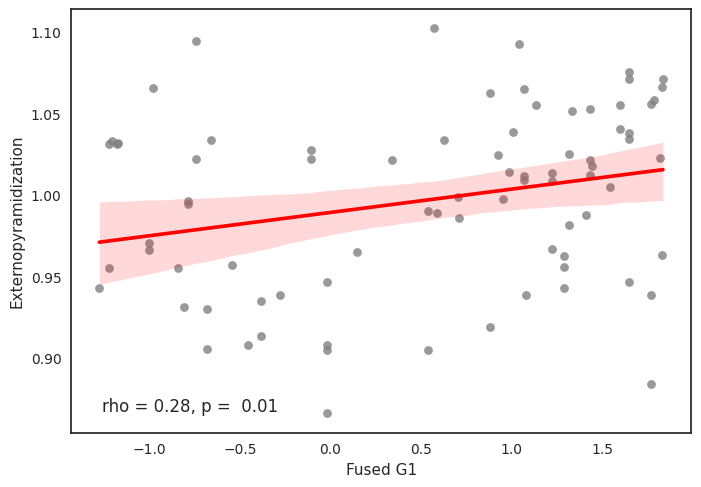

In [11]:
expyr = pd.DataFrame({
    'Externopyramidization': laminar_size.loc[:, '3'] / laminar_size.loc[:, '5'],
    'Fused G1': samples['FusedG1']
})

ax = sns.regplot(
    data=expyr, 
    x='Fused G1', y='Externopyramidization',
    scatter_kws=dict(
        s=40, color='grey'),
    line_kws=dict(color='red'),
)
text_x = ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.05
text_y = ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.05
r, p = scipy.stats.spearmanr(expyr['Externopyramidization'], expyr['Fused G1'])
ax.text(
    text_x, text_y, f'rho = {r:.2f}, p = {p: .2f}'
)